<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice3.png' width=300/></center>

<center>본 실습에서 요구하는 내용 외에도 다양한 내용을 스스로 추가하여  탐색하고 분석해 보기를 권고합니다.</center>




# 서울시 인구 분석

<img src='https://raw.githubusercontent.com/Jangrae/img/master/people2.png' width="650" align="left">

## 1.환경 설정

- 데이터 탐색과 전처리를 하기 전 라이브러리와 파일을 읽어옵니다.
- 시각화에 한글이 포함된 경우 이에 대한 설정을 진행합니다.

**1) 한글 설정**

- Jupyter Notebook 시각화에 한글이 표시되게 설정합니다.

In [34]:
# 라이브러리 불러오기
import matplotlib 
import matplotlib.pyplot as plt

# 폰트설정
matplotlib.font_manager._rebuild()
plt.rc('font', family='Malgun Gothic')  #맑은 고딕 설치(한글 폰트 사용 가능)
plt.rcParams['axes.unicode_minus'] = False

**2) 라이브러리 불러오기**

- 사용할 라이브러리를 불러옵니다.

In [35]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

**3) 데이터 읽어오기**

- 다음 경로의 파일을 읽어와 pop01, pop02, pop03 데이터프레임을 만듭니다.
- 파일 경로1: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h01.csv'    
- 파일 경로2: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h02.csv'
- 파일 경로3: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h03.csv'
- 단축 경로1: 'https://bit.ly/PopH01File'
- 단축 경로2: 'https://bit.ly/PopH02File'
- 단축 경로3: 'https://bit.ly/PopH03File'

In [36]:
# pop01 데이터 읽어오기

pop01 = pd.read_csv('https://bit.ly/PopH01File')

# 확인

print(pop01.head())

   year  k_male  k_female
0  1981    4160      4191
1  1982    4160      4191
2  1983    4160      4191
3  1984    4160      4191
4  1985    4160      4191


In [37]:
# pop02 데이터 읽어오기

pop02 = pd.read_csv('https://bit.ly/PopH02File')

# 확인

print(pop02.head())

   year  f_male  f_female
0  1985       7         6
1  1986       7         5
2  1987       6         5
3  1988       5         5
4  1989       6         5


In [38]:
# pop03 데이터 읽어오기

pop03 = pd.read_csv('https://bit.ly/PopH03File')

# 확인

print(pop03.head())

   year  household  older_65
0  1981       1915       246
1  1982       2001       260
2  1983       2116       260
3  1984       2246       275
4  1985       2338       211


## 2. 데이터 탐색

다음과 같은 정보 확인을 통해 처리할 대상 데이터를 이해합니다.
- 상/하위 데이터 확인
- 데이터프레임 크기 확인
- 열 이름, 데이터 형식, 값 개수 등 확인
- 기초 통계정보 확인
- 결측치 확인
- 범주형 데이터 확인
- 개별 열 값 상세 확인 등

**1) 데이터프레임 크기 확인**

- 세 개의 데이터프레임 크기(행 수, 열 수)를 확인합니다.

In [39]:
# 데이터 크기 확인


print(pop01.shape)
print(pop02.shape)
print(pop03.shape)

(40, 3)
(36, 3)
(40, 3)


**2) year 최솟값, 최댓값 확인**

- 세 개의 데이터프레임 year열 최솟값, 최댓값 크기를 비교해 차이가 있는 지 각각 확인합니다.

In [40]:
# year 최댓값, 최솟값 확인

print(pop01.loc[ : ,'year'].min())
print(pop02.loc[ : ,'year'].min())
print(pop03.loc[ : ,'year'].min())

1981
1985
1981


**3) 결측치 확인**

- 세 개의 데이터프레임에 결측치가 있는 지 각각 확인합니다.

In [41]:
# 결측치 확인

print(pop01.isnull().sum())
print(pop02.isnull().sum())
print(pop03.isnull().sum())



year        0
k_male      0
k_female    0
dtype: int64
year        0
f_male      0
f_female    0
dtype: int64
year         0
household    0
older_65     0
dtype: int64


## 3. 데이터 전처리

전처리 과정에서 다음과 같은 처리를 할 수 있습니다.

- 결측치 처리
- 값 변경
- 열 추가
- 불필요한 열 제거
- 열 이름 변경
- 데이터 통합(연결 또는 조인)
- 가변수화 등

**1) 데이터 통합**

- concat을 사용해 연결하면 인덱스 값을 기준으로 연결되어 데이터가 어긋납니다.
- **year** 열을 기준으로 **outer** 방식으로 조인(병합)합니다.
- 외국인 정보가 1981 ~ 1984년이 누락되어 결측치가 발생할 것입니다.
- 세 개의 데이터프레임을 병합(조인)하여 pop 데이터프레임을 선언합니다.
- 이후의 모든 작업은 pop 데이터프레임을 대상으로 진행합니다.

In [42]:

pop = pd.merge(pop01, pop02, on = 'year', how = 'outer')
pop = pd.merge(pop, pop03, on = 'year', how = 'outer')

# 확인

pop

,year,k_male,k_female,f_male,f_female,household,older_65
0,1981,4160,4191,NaN,NaN,1915,246
1,1982,4160,4191,NaN,NaN,2001,260
2,1983,4160,4191,NaN,NaN,2116,260
3,1984,4160,4191,NaN,NaN,2246,275
4,1985,4160,4191,7.0,6.0,2338,211
5,1986,4899,4888,7.0,5.0,2428,305
6,1987,5000,4979,6.0,5.0,2518,329
7,1988,5156,5120,5.0,5.0,2658,349
8,1989,5305,5261,6.0,5.0,2817,363
9,1990,5321,5282,5.0,4.0,2820,363


**2) 결측치 확인**

- 결측치가 있는지 확인합니다.

In [43]:
# 결측치 확인

print(pop.isnull())

     year  k_male  k_female  f_male  f_female  household  older_65
0   False   False     False    True      True      False     False
1   False   False     False    True      True      False     False
2   False   False     False    True      True      False     False
3   False   False     False    True      True      False     False
4   False   False     False   False     False      False     False
5   False   False     False   False     False      False     False
6   False   False     False   False     False      False     False
7   False   False     False   False     False      False     False
8   False   False     False   False     False      False     False
9   False   False     False   False     False      False     False
10  False   False     False   False     False      False     False
11  False   False     False   False     False      False     False
12  False   False     False   False     False      False     False
13  False   False     False   False     False      False     F

**3) 결측치 저리**

- 연도별 인구 현황이므로 임의의 값을 채우는 것이 바람직하지 않아 보입니다.
- 이후 값, 즉 1985년 값으로 채우는 것도 정확한 분석을 방해할 것 같습니다.
- 이에 결측치가 있는 1981년~1984년 행을 제거할 것입니다.

In [44]:
# 결측치 제거

pop.dropna(axis = 0 , inplace = True) # 실행 전에 묻기
           
# 확인
pop

,year,k_male,k_female,f_male,f_female,household,older_65
4,1985,4160,4191,7.0,6.0,2338,211
5,1986,4899,4888,7.0,5.0,2428,305
6,1987,5000,4979,6.0,5.0,2518,329
7,1988,5156,5120,5.0,5.0,2658,349
8,1989,5305,5261,6.0,5.0,2817,363
9,1990,5321,5282,5.0,4.0,2820,363
10,1991,5468,5405,18.0,14.0,3330,424
11,1992,5500,5435,19.0,16.0,3383,434
12,1993,5478,5412,19.0,17.0,3431,445
13,1994,5409,5351,21.0,19.0,3456,454


**3) 열 추가**

- 이후 분석의 편의를 위해 다음과 같은 의미를 갖는 열을 추가하고자 합니다.
    - k_total = 전체 한국인 인구수
    - f_total = 전체 외국인 인구수
    - male = 전체 남자 인구수
    - female = 전체 여자 인구수
    - total = 전체 인구수
- 추가할 열에 대한 공식은 다음과 같습니다.
    - k_total = k_male + k_female
    - f_total = f_male + f_female
    - male = k_male + f_male
    - female = k_female + f_female
    - total = k_total + f_total
- 정리한 공식에 따라 데이터프레임에 열을 추가합니다.

In [45]:
# 열 추가

pop['k_total'] = pop['k_male'] + pop ['k_female']
pop['f_total'] = pop['f_male'] + pop ['f_female']
pop['male'] = pop['k_male'] + pop['f_male']
pop['female'] = pop['k_female'] + pop ['f_female']
pop['total'] = pop['k_total'] + pop['f_total']


#  확인
pop

,year,k_male,k_female,f_male,f_female,household,older_65,k_total,f_total,male,female,total
4,1985,4160,4191,7.0,6.0,2338,211,8351,13.0,4167.0,4197.0,8364.0
5,1986,4899,4888,7.0,5.0,2428,305,9787,12.0,4906.0,4893.0,9799.0
6,1987,5000,4979,6.0,5.0,2518,329,9979,11.0,5006.0,4984.0,9990.0
7,1988,5156,5120,5.0,5.0,2658,349,10276,10.0,5161.0,5125.0,10286.0
8,1989,5305,5261,6.0,5.0,2817,363,10566,11.0,5311.0,5266.0,10577.0
9,1990,5321,5282,5.0,4.0,2820,363,10603,9.0,5326.0,5286.0,10612.0
10,1991,5468,5405,18.0,14.0,3330,424,10873,32.0,5486.0,5419.0,10905.0
11,1992,5500,5435,19.0,16.0,3383,434,10935,35.0,5519.0,5451.0,10970.0
12,1993,5478,5412,19.0,17.0,3431,445,10890,36.0,5497.0,5429.0,10926.0
13,1994,5409,5351,21.0,19.0,3456,454,10760,40.0,5430.0,5370.0,10800.0


**4) (옵션) 열 순서 변경**

- 데이터 이해를 돕기 위해 다음과 같은 순서로 데이터프레임 열 순서를 변경합니다.
- year, household, total, male, female, k_total, k_male, k_female, f_total, f_male, f_female, older_65


In [46]:
# 열 순서 변경

col = ['year', 'household', 'total', 'male', 'female', 'k_total', 'k_male', 'k_female', 'f_total', 'f_male', 'f_female', 'older_65']
pop = pop[col]

# 확인
pop

,year,household,total,male,female,k_total,k_male,k_female,f_total,f_male,f_female,older_65
4,1985,2338,8364.0,4167.0,4197.0,8351,4160,4191,13.0,7.0,6.0,211
5,1986,2428,9799.0,4906.0,4893.0,9787,4899,4888,12.0,7.0,5.0,305
6,1987,2518,9990.0,5006.0,4984.0,9979,5000,4979,11.0,6.0,5.0,329
7,1988,2658,10286.0,5161.0,5125.0,10276,5156,5120,10.0,5.0,5.0,349
8,1989,2817,10577.0,5311.0,5266.0,10566,5305,5261,11.0,6.0,5.0,363
9,1990,2820,10612.0,5326.0,5286.0,10603,5321,5282,9.0,5.0,4.0,363
10,1991,3330,10905.0,5486.0,5419.0,10873,5468,5405,32.0,18.0,14.0,424
11,1992,3383,10970.0,5519.0,5451.0,10935,5500,5435,35.0,19.0,16.0,434
12,1993,3431,10926.0,5497.0,5429.0,10890,5478,5412,36.0,19.0,17.0,445
13,1994,3456,10800.0,5430.0,5370.0,10760,5409,5351,40.0,21.0,19.0,454


**5) (옵션) 인덱스 초기화**

- 인덱스가 0부터 시작하는 일련 변호를 갖지 않는다면 인덱스를 초기화합니다.

In [47]:
# 인덱스 초기화

pop.reset_index(drop=True,inplace=True)

# 확인
pop

,year,household,total,male,female,k_total,k_male,k_female,f_total,f_male,f_female,older_65
0,1985,2338,8364.0,4167.0,4197.0,8351,4160,4191,13.0,7.0,6.0,211
1,1986,2428,9799.0,4906.0,4893.0,9787,4899,4888,12.0,7.0,5.0,305
2,1987,2518,9990.0,5006.0,4984.0,9979,5000,4979,11.0,6.0,5.0,329
3,1988,2658,10286.0,5161.0,5125.0,10276,5156,5120,10.0,5.0,5.0,349
4,1989,2817,10577.0,5311.0,5266.0,10566,5305,5261,11.0,6.0,5.0,363
5,1990,2820,10612.0,5326.0,5286.0,10603,5321,5282,9.0,5.0,4.0,363
6,1991,3330,10905.0,5486.0,5419.0,10873,5468,5405,32.0,18.0,14.0,424
7,1992,3383,10970.0,5519.0,5451.0,10935,5500,5435,35.0,19.0,16.0,434
8,1993,3431,10926.0,5497.0,5429.0,10890,5478,5412,36.0,19.0,17.0,445
9,1994,3456,10800.0,5430.0,5370.0,10760,5409,5351,40.0,21.0,19.0,454


## 4. 데이터 분석

- 데이터를 집계하고 간단히 시각화하여 분석합니다.
- 연속형 값은 선 그래프, 범주형 값은 막대 그래프로 시각화함이 일반적입니다.

**1) 전체 인구 변화**

- 전체 인구 변화를 선 그래프로 시각화해 확인합니다.

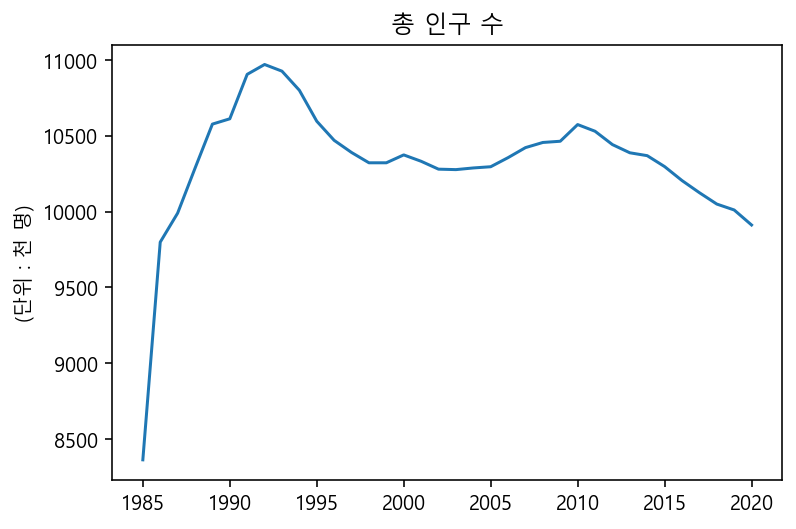

In [87]:
# 전체 인구 변화

plt.plot(pop['year'],pop['total'])
plt.title('총 인구 수')
plt.ylabel('(단위 : 천 명)')
plt.show()



**2) 남녀 인구 변화**

- 전체 남녀 인구 변화를 선 그래프로 시각화해 확인합니다.


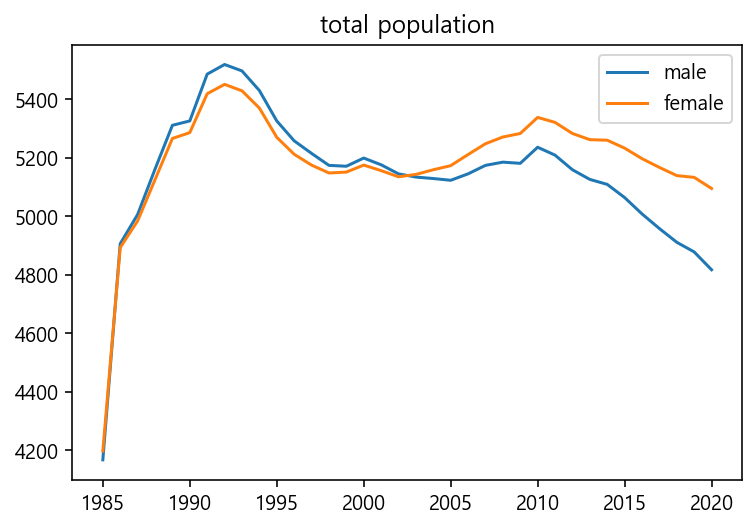

In [52]:
# 남녀 인구 변화

plt.plot(pop['year'],pop['male'])
plt.plot(pop['year'],pop['female'])
plt.legend(['male','female'])
plt.title('total population')
plt.show()



**3) 한국인 인구 변화**

- 한국인 인구 변화를 선 그래프로 시각화해 확인합니다.

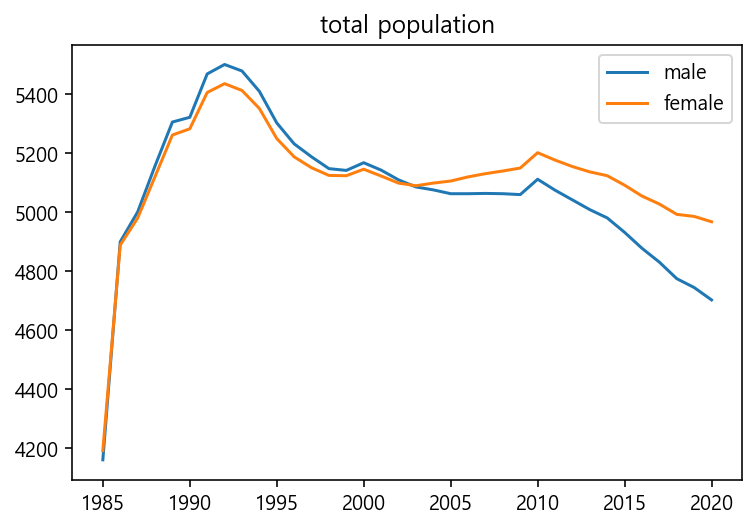

In [53]:
# 한국인 남녀 인구 변화

plt.plot(pop['year'],pop['k_male'])
plt.plot(pop['year'],pop['k_female'])
plt.legend(['k_male','k_female'])
plt.title('total population')
plt.show()


**4) (옵션) 외국인 인구 변화**

- 외국인 인구 변화를 선 그래프로 시각화해 확인합니다.

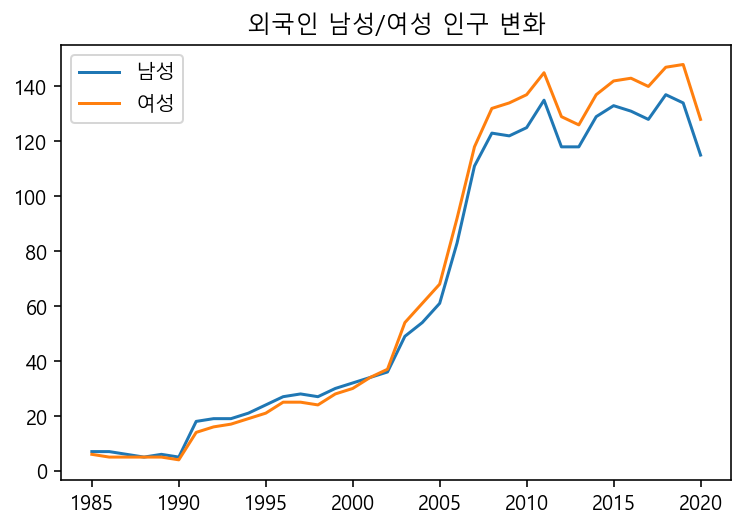

In [91]:
# 외국인 남녀 인구 변화

plt.plot(pop['year'],pop['f_male'])
plt.plot(pop['year'],pop['f_female'])
plt.legend(['남성','여성'])
plt.title('외국인 남성/여성 인구 변화')
plt.show()


**5) (옵션) 가구수 변화**

- 가구수 변화를 선 그래프로 시각화해 확인합니다.

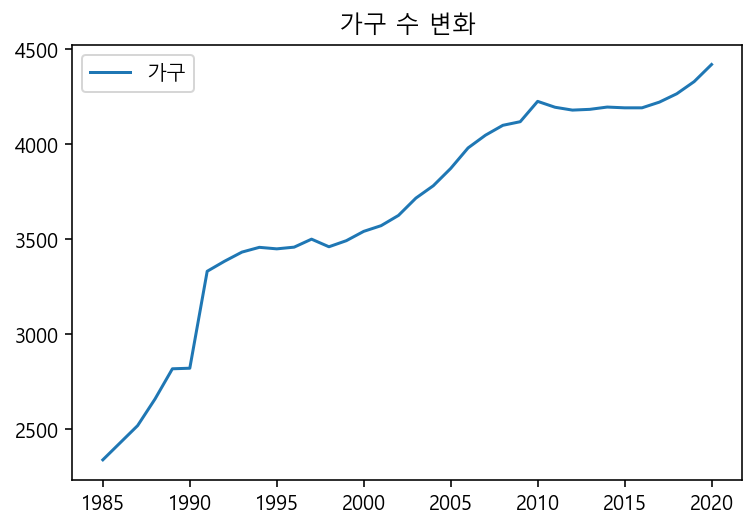

In [58]:
# 가구수 변화

plt.plot(pop['year'],pop['household'])
plt.xlabel('연도')
plt.legend(['가구'])
plt.title('가구 수 변화')
plt.show()


**6) (옵션) 노령인구 변화**

- 노령인구 변화를 선 그래프로 시각화해 확인합니다.

추가) 가구 당 구성원 수

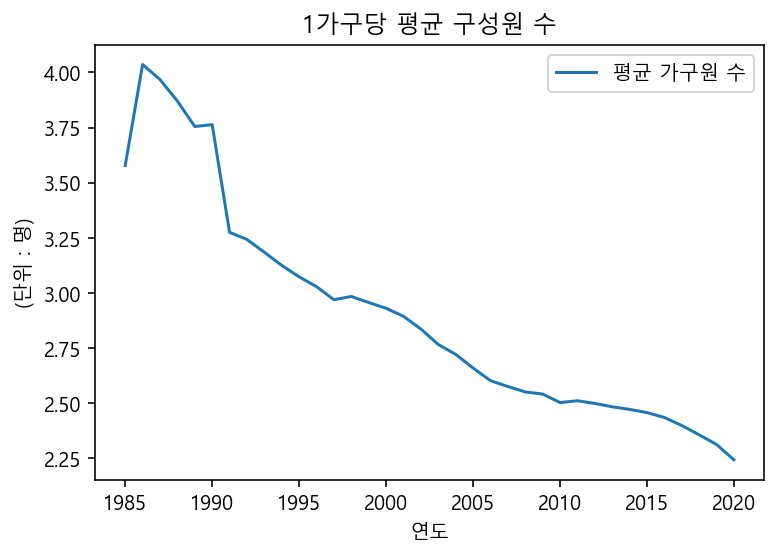

In [90]:
# 평균 가구원 수

plt.plot(pop['year'],pop['total']/pop['household'])
plt.ylabel('(단위 : 명)')
plt.legend(['평균 가구원 수'])
plt.title('1가구당 평균 구성원 수')
plt.show()


추가) 총 인구 수와 노령 인구 수

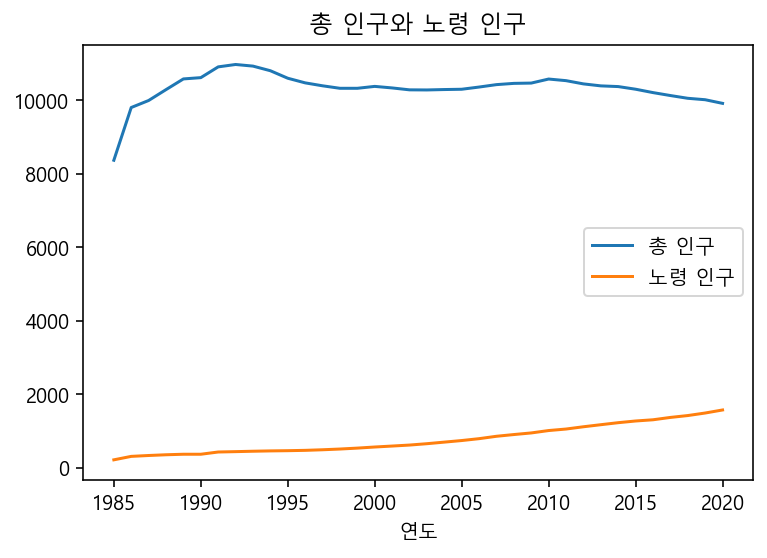

In [92]:
plt.plot(pop['year'],pop['total'])
plt.plot(pop['year'],pop['older_65'])
plt.xlabel('연도')
plt.legend(['총 인구','노령 인구'])
plt.title('총 인구와 노령 인구')
plt.show()

추가) 노령화 지수

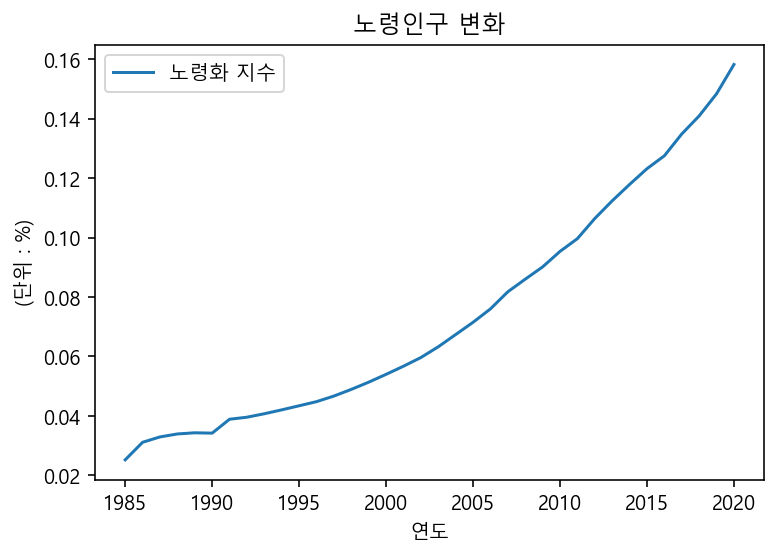

In [93]:
# 65세 이상 변화

plt.plot(pop['year'],pop['older_65']/pop['total'])
plt.legend(['노령화 지수'])
plt.xlabel('연도')
plt.ylabel('(단위 : %)')
plt.title('노령인구 변화')
plt.show()


추가) 서울 인구 성비

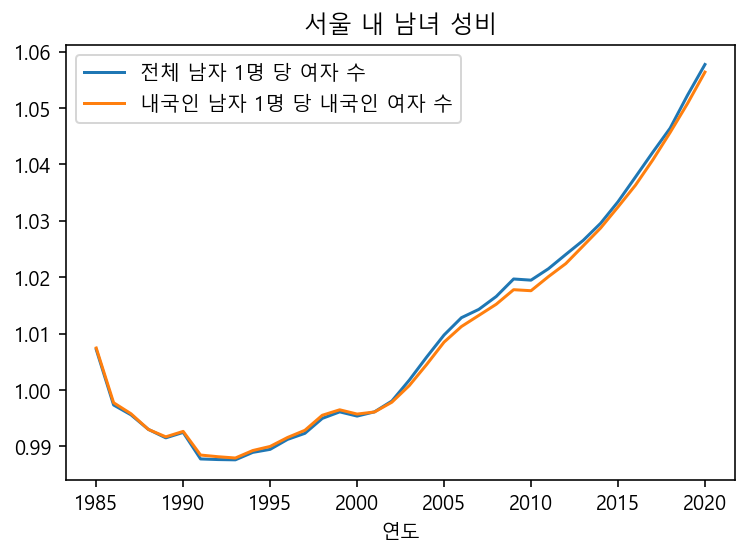

In [94]:
plt.plot(pop['year'],pop['female']/pop['male'])
plt.plot(pop['year'],pop['k_female']/pop['k_male'])
plt.xlabel('연도')
plt.legend(['전체 남자 1명 당 여자 수','내국인 남자 1명 당 내국인 여자 수'])
plt.title('서울 내 남녀 성비')
plt.show()

추가)서울 인구 내 외국인 비율

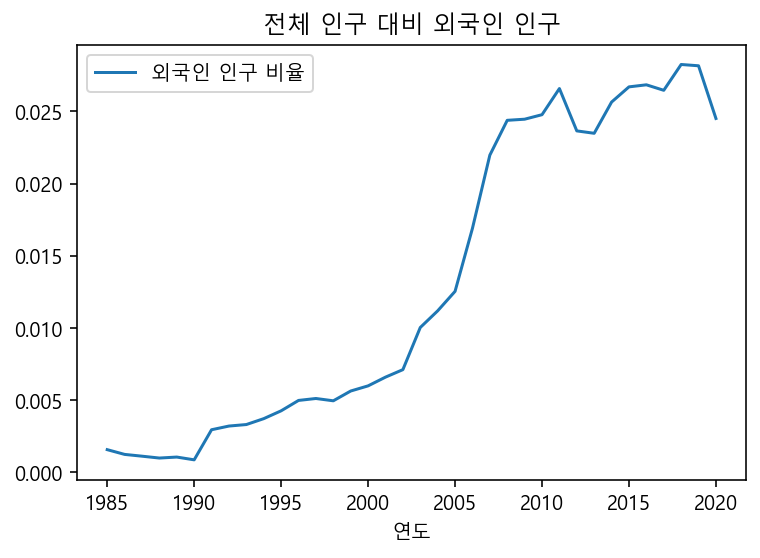

In [95]:
plt.plot(pop['year'],pop['f_total']/pop['total'])
plt.legend(['외국인 인구 비율'])
plt.xlabel('연도')
plt.title('전체 인구 대비 외국인 인구')
plt.show()

## 5.정리

- 분석을 통해 확인한 내용을 정리합니다.

**1) 의견**

- 전체 인구수 감소 추세, 특히 남성 인구수 빠르게 감소
- 가구당 인구수 감소, 1인 가구 증가
- 전체 인구에서 외국인이 차지하는 비중 증가
- 총 인구에서 노령 인구가 차지하는 비율 증가
- 여성 비율 증가

**2) 기타**

- 노령화가 진행됨에 따라 이에 따른 대책이 필요해 보인다.(대중교통, 헬스케어, 노인복지 등)
- 1인 가구가 정서적으로 소외되지 않도록 하는 정책이 있으면 좋겠다.
- 인구수 감소와 노령화 진행이 동시에 빠른 속도로 진행되는 만큼 생산가능인구의 급격한 공백 충격이 예상된다. 
- 외국인 인구 비율이 증가하는 추세이나, 2020년 이후로 코로나19의 유행으로 인해 외국인 유입이 주춤한 것으로 보인다.
- 성비가 여성이 더 많은 쪽으로 불균형이 이루어지고 있는데, 이는 노령화의 진행과 평균 남성 수명이 여성보다 짧기 때문으로 추정된다.